In [1]:
library(devtools)
library(ggridges)
library(dplyr)
library(tidyr)
library(ggplot2)
library(quantmod)
library(xts)
library(zoo)
library(gridExtra)
library(tidyverse)
library(tibble)
library(grid)
library(DescTools)

set.seed(1)
load_all("../../../hmmTMB")
source("markets_functions.R")  # adjust path if the notebook’s cwd differs

plot_folder <- "TSX-covariates_no_horseshoe"

Loading required package: usethis


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', ex

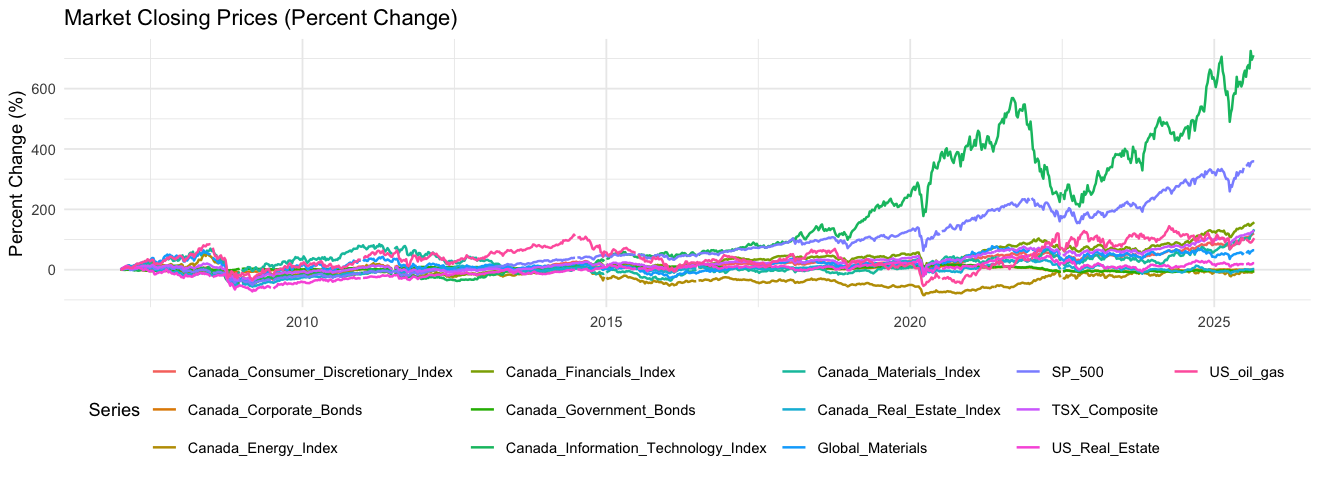

[1] 3

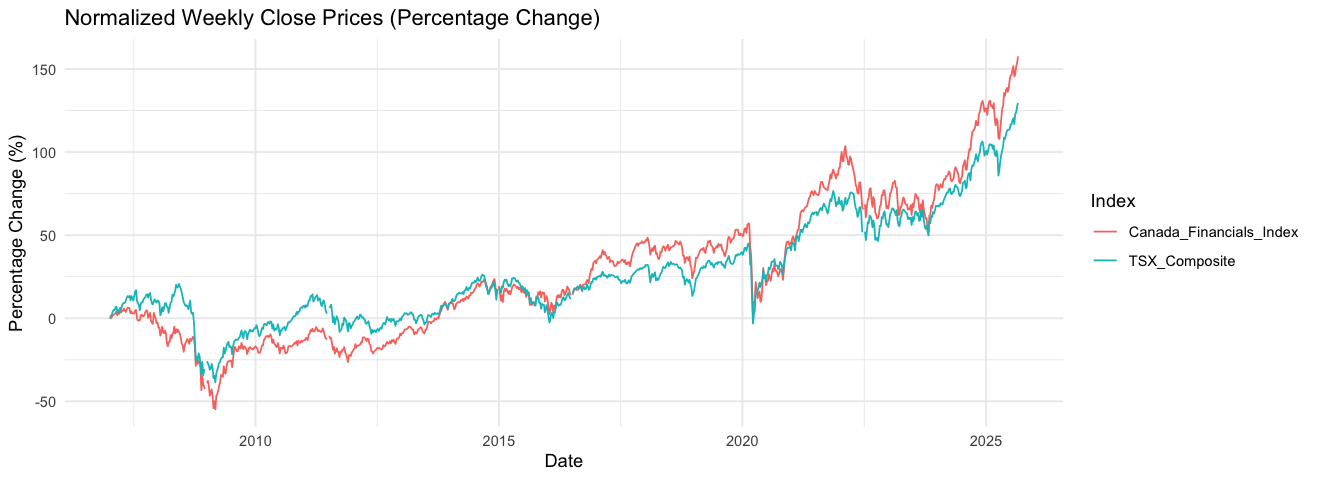

In [298]:

close_data <- get_markets_data("2007-01-01", "2025-09-01", "weeks")

close_data <- close_data %>%
  select(Date, TSX_Composite, Canada_Financials_Index)

# Reshape data for ggplot
close_data_long <- close_data %>%
  mutate(Date = as.Date(rownames(close_data))) %>%
  pivot_longer(-Date, names_to = "Index", values_to = "Close") %>%
  group_by(Index) %>%
  mutate(Close = (Close / first(Close) - 1) * 100)

# Plot using ggplot2
ggplot(close_data_long, aes(x = Date, y = Close, color = Index)) +
  geom_line() +
  labs(title = "Normalized Weekly Close Prices (Percentage Change)", x = "Date", y = "Percentage Change (%)") +
  theme_minimal()

ncol(close_data)

# TSX model with Covariates

In [299]:
close_data <- close_data %>%
  filter(!is.na(TSX_Composite) & !is.na(Canada_Financials_Index) & 
         TSX_Composite != 0 & Canada_Financials_Index != 0)

In [300]:
close_data

Date       TSX_Composite Canada_Financials_Index
2007-01-05 2007-01-05 19.90882      26.570                 
2007-01-12 2007-01-12 20.20263      26.560                 
2007-01-19 2007-01-19 20.30142      26.760                 
2007-01-26 2007-01-26 20.69655      27.060                 
2007-02-02 2007-02-02 20.91185      27.130                 
2007-02-09 2007-02-09 20.87386      27.220                 
2007-02-16 2007-02-16 21.23354      27.400                 
2007-02-23 2007-02-23 21.29433      27.625                 
2007-03-02 2007-03-02 20.56991      27.010                 
2007-03-09 2007-03-09 20.87639      27.640                 
2007-03-16 2007-03-16 20.51672      27.275                 
2007-03-23 2007-03-23 21.16768      27.915                 
2007-03-30 2007-03-30 21.01317      27.480                 
2007-04-05 2007-04-05 21.40578      27.830                 
2007-04-13 2007-04-13 21.65653      27.735                 
2007-04-20 2007-04-20 21.73252      28.125                 
2007-04-27 2007-04-27 21.75025      27.820                 
2007-05-04 2007-05-04 21.99595      27.580                 
2007-05-11 2007-05-11 22.34043      27.925                 
2007-05-18 2007-05-18 22.55572      28.225                 
2007-05-25 2007-05-25 22.43668      28.245                 
2007-06-01 2007-06-01 22.57852      28.140                 
2007-06-08 2007-06-08 22.06434      27.375                 
2007-06-15 2007-06-15 22.56839      27.650                 
2007-06-22 2007-06-22 22.38095      27.320                 
2007-06-29 2007-06-29 22.03647      27.320                 
2007-07-06 2007-07-06 22.53040      27.355                 
2007-07-13 2007-07-13 23.08004      27.770                 
2007-07-20 2007-07-20 23.27254      27.885                 
2007-07-27 2007-07-27 21.99848      26.570                 
⋮          ⋮          ⋮             ⋮                      
2025-02-07 2025-02-07 40.62         60.50                  
2025-02-14 2025-02-14 40.71         60.54                  
2025-02-21 2025-02-21 40.19         60.14                  
2025-02-28 2025-02-28 40.59         60.96                  
2025-03-07 2025-03-07 39.60         58.55                  
2025-03-14 2025-03-14 39.33         57.42                  
2025-03-21 2025-03-21 40.00         58.44                  
2025-03-28 2025-03-28 39.43         58.10                  
2025-04-04 2025-04-04 36.99         55.44                  
2025-04-11 2025-04-11 37.65         55.23                  
2025-04-17 2025-04-17 38.62         56.65                  
2025-04-25 2025-04-25 39.48         58.40                  
2025-05-02 2025-05-02 39.98         60.08                  
2025-05-09 2025-05-09 40.52         60.53                  
2025-05-16 2025-05-16 41.54         62.57                  
2025-05-23 2025-05-23 41.39         62.15                  
2025-05-30 2025-05-30 41.87         62.95                  
2025-06-06 2025-06-06 42.31         63.40                  
2025-06-13 2025-06-13 42.48         62.77                  
2025-06-20 2025-06-20 42.48         63.35                  
2025-06-27 2025-06-27 42.52         64.64                  
2025-07-04 2025-07-04 43.13         65.39                  
2025-07-11 2025-07-11 43.11         65.37                  
2025-07-18 2025-07-18 43.59         66.35                  
2025-07-25 2025-07-25 43.88         66.88                  
2025-08-01 2025-08-01 43.16         65.22                  
2025-08-08 2025-08-08 44.34         65.61                  
2025-08-15 2025-08-15 44.60         66.79                  
2025-08-22 2025-08-22 45.29         67.41                  
2025-08-29 2025-08-29 45.70         68.43

In [301]:
train_size <- 110
test_size <- 2
samples <- 20
splits <- train_test_split(
  close_data,
  training_period = train_size,
  testing_period = test_size,
  samples = samples
)

# options(repr.plot.width = 9, repr.plot.height = 8)  # Adjust figure size

# plot_train_test_samples(splits,
#   y_column = "TSX_Composite"
#   )
# plot_train_test_samples(splits,
#   y_column = "Canada_Financials_Index")

In [302]:
log_train <- lapply(splits$train, function(x) ln_transform(x))
log_test <- lapply(seq_along(splits$test), function(i) ln_transform(splits$test[[i]], previous_row = tail(splits$train[[i]], 1)))

forecasts_no_cov <- list()
forecasts_w_cov <- list()
for (sample in seq_len(samples)) {
  cov_model <- fit_markets_hmm(
      n_states = 3,
      data = log_train[[sample]],
      obs_name = "Canada_Financials_Index"
  )
  # cov_df <- cov_model$state_probs()

  cov_forecast <- Forecast$new(
    hmm = cov_model,
    forecast_data = log_test[[sample]],
    starting_state_distribution = "last",
    preset_eval_range = list(Canada_Financials_Index = seq(from = -0.15, to = 0.15, by = 0.001))
  )

  cov_df <- rbind(cov_model$state_probs(), matrix(cov_forecast$hidden_state_forecast(), ncol = 3))

  train_df <- cbind(lead(cov_df, 1)[0:train_size, ], log_train[[sample]])
  train_df[is.na(train_df)] <- 0
  test_df <- cbind(lead(cov_df, 1)[(train_size + 1):(train_size + test_size), ], log_test[[sample]])
  test_df[is.na(test_df)] <- 0

  test_obs <- log_test[[sample]]$TSX_Composite

  tsx_model_no_cov <- fit_markets_hmm(
      n_states = 3,
      data = train_df,
      obs_name = "TSX_Composite"
  )
  forecast_no_cov <- Forecast$new(
    hmm = tsx_model_no_cov,
    forecast_data = test_df,
    starting_state_distribution = "last",
    preset_eval_range = list(TSX_Composite = seq(from = -0.15, to = 0.15, by = 0.001))
  )
  tsx_model_w_cov <- fit_markets_hmm(
      n_states = 3,
      data = train_df,
      obs_name = "TSX_Composite",
      hid_formula = ~ state1 + state2 + state3
  )
  forecast_w_cov <- Forecast$new(
    hmm = tsx_model_w_cov,
    forecast_data = test_df,
    starting_state_distribution = "last",
    preset_eval_range = list(TSX_Composite = seq(from = -0.15, to = 0.15, by = 0.001))
  )

  # no_cov_dists <- forecast_no_cov$forecast_dists()[[1]][, 1]
  # w_cov_dists <- forecast_w_cov$forecast_dists()[[1]][, 1]

  # log_return_traces <- compute_log_loss_traces(
  #   true_forecast = list(log_test[[sample]]),
  #   forecast_dist = list(w_cov_dists),
  #   forecast_range = list(forecast_no_cov$eval_range()[[1]]),
  #   observation = "TSX_Composite"
  # )
  forecasts_no_cov <- c(forecasts_no_cov, list(forecast_no_cov))
  forecasts_w_cov <- c(forecasts_w_cov, list(forecast_w_cov))

  forecast_dists
}

Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradien

In [303]:
observation <- "TSX_Composite"
for (forecasts in list(forecasts_no_cov, forecasts_w_cov)) {

  forecast_eval_range <- lapply(forecasts, function(forecast) {
    forecast$eval_range()[[observation]]
  })
  forecast_dists <- lapply(forecasts, function(forecast) {
    forecast$forecast_dists()[[observation]][, 1]
  })

  log_return_traces <- compute_log_loss_traces(
    true_forecast = log_test,
    forecast_dist = forecast_dists,
    forecast_range = forecast_eval_range,
    observation = observation
  )
  print(sum(log_return_traces$traces))
  # plot_log_loss_traces(
  #   log_loss_results=log_return_traces,
  #   title="Log Loss of Log Return"
  # )
}

[1] -52.43735
[1] -44.37251


In [238]:
sum(log_return_traces$traces)

[1] -53.74477

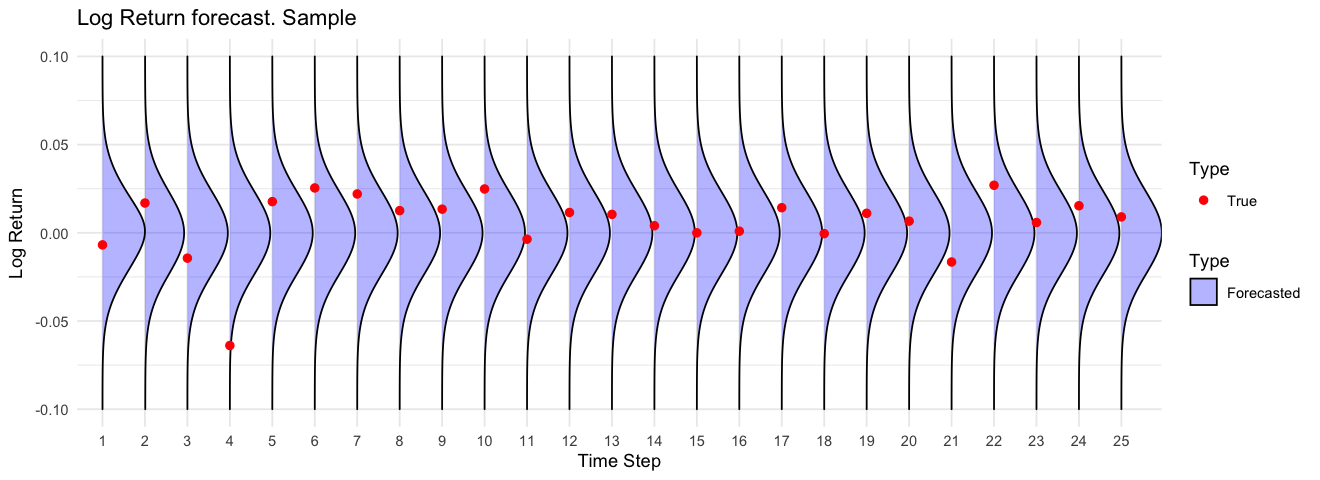

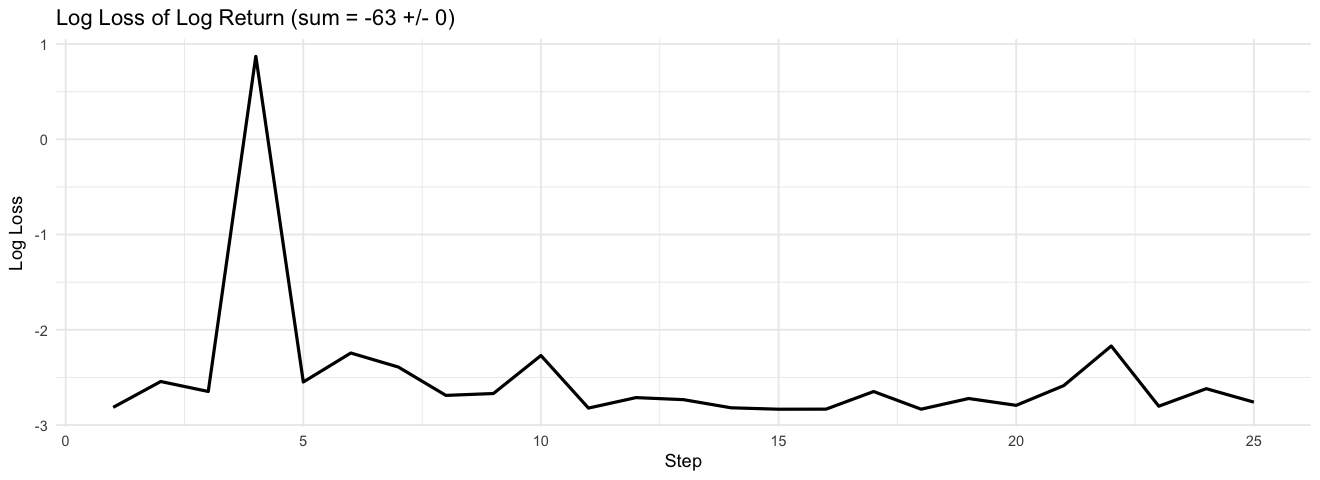

In [190]:
observation <- "TSX_Composite"
forecast <- forecast_w_cov # forecast_w_cov

forecast_eval_range <- forecast$eval_range()[[observation]]

forecast_dists <- forecast$forecast_dists()[[observation]]

forecast_dists_normalized <- apply(forecast_dists, 2, function(col) col / sum(col))

plot_ridge_data(
  # Timesteps ahead to be plotted
  forecast_timesteps = seq(1, test_size, by=1),
  forecast_steps = forecast_eval_range,
  forecast_data = forecast_dists,
  true_values = log_test[[sample]][[observation]],
  title = paste0("Log Return forecast. Sample "),
  y_label = "Log Return",
)

log_return_traces <- compute_log_loss_traces(
  true_forecast = list(log_test[[sample]]),
  forecast_dist = list(forecast_dists),
  forecast_range = list(forecast_eval_range),
  observation = observation
)
plot_log_loss_traces(
  log_loss_results=log_return_traces,
  title="Log Loss of Log Return"
)

In [48]:
ln_transform(splits$train[[1]])

TSX_Composite Canada_Financials_Index
2007-01-05  0.0000000000  0.0000000000          
2007-01-12  0.0146504144 -0.0003764438          
2007-01-19  0.0048777187  0.0075019393          
2007-01-26  0.0192764711  0.0111483592          
2007-02-02  0.0103489433  0.0025834927          
2007-02-09 -0.0018185352  0.0033118763          
2007-02-16  0.0170841776  0.0065910275          
2007-02-23  0.0028588814  0.0081781604          
2007-03-02 -0.0346114510 -0.0225139836          
2007-03-09  0.0147897306  0.0230568005          
2007-03-16 -0.0173789070 -0.0132934591          
2007-03-23  0.0312354634  0.0231936938          
2007-03-30 -0.0073261295 -0.0157057609          
2007-04-05  0.0185113532  0.0126561221          
2007-04-13  0.0116464706 -0.0034193973          
2007-04-20  0.0035026734  0.0139636850          
2007-04-27  0.0008155281 -0.0109036850          
2007-05-04  0.0112327831 -0.0086643059          
2007-05-11  0.0155396358  0.0124314480          
2007-05-18  0.0095909941  0.0106858059          
2007-05-25 -0.0052918063  0.0007083569          
2007-06-01  0.0063020609 -0.0037244505          
2007-06-08 -0.0230365038 -0.0275618419          
2007-06-15  0.0225876653  0.0099955260          
2007-06-22 -0.0083399726 -0.0120066906          
2007-06-29 -0.0155112773  0.0000000000          
2007-07-06  0.0221663090  0.0012802872          
2007-07-13  0.0241029474  0.0150570070          
2007-07-20  0.0083059953  0.0041326002          
2007-07-27 -0.0563008988 -0.0483061698          
⋮          ⋮             ⋮                      
2016-01-08 -0.0441649345 -0.047776450           
2016-01-15 -0.0298683147 -0.036472727           
2016-01-22  0.0268195904  0.033631819           
2016-01-29  0.0305711552  0.032193125           
2016-02-05 -0.0004937113 -0.014219132           
2016-02-12 -0.0290602331 -0.042088894           
2016-02-19  0.0344776046  0.040340974           
2016-02-26 -0.0004912858 -0.017649593           
2016-03-04  0.0319176282  0.036024202           
2016-03-11  0.0244487411  0.031780857           
2016-03-18 -0.0088639981  0.006633549           
2016-03-24 -0.0103628247 -0.011972229           
2016-04-01  0.0075472090  0.012633182           
2016-04-08 -0.0023524175 -0.013302478           
2016-04-15  0.0177409358  0.028059226           
2016-04-22  0.0183406901  0.013258072           
2016-04-29  0.0058890185 -0.001285729           
2016-05-06 -0.0168530007 -0.027720685           
2016-05-13  0.0027523288  0.009871786           
2016-05-20  0.0136488931  0.012689267           
2016-05-27  0.0130193381  0.022063262           
2016-06-03  0.0093229886 -0.007937809           
2016-06-10 -0.0133453895 -0.009931248           
2016-06-17 -0.0153432791 -0.018194117           
2016-06-24 -0.0004547755 -0.006909028           
2016-07-01            NA           NA           
2016-07-08            NA           NA           
2016-07-15  0.0158036099  0.027301018           
2016-07-22  0.0082412280  0.006073173           
2016-07-29 -0.0012967526 -0.005111827

In [30]:
# Assuming train_data_log is a data frame (as matrices in R cannot have mixed types).
# If it is truly a matrix, convert it to a data frame first: train_data_log <- as.data.frame(train_data_log)

# Identify numeric columns
num_cols <- names(train_data_log)[sapply(train_data_log, is.numeric)]

# Function to compute p-value using DescTools::PearsonTest
compute_pval <- function(x) {
  x <- na.omit(x)  # Remove NAs
  if (length(x) < 10 || length(unique(x)) < 2) {
    return(NA)  # Insufficient data or constant values
  }
  res <- tryCatch(PearsonTest(x), error = function(e) NA)
  if (is.null(res)) return(NA)
  return(res$p.value)
}

# Create helper data frame with statistics
helper_df <- data.frame(
  covariate = num_cols,
  mean = sapply(num_cols, function(col) mean(train_data_log[[col]], na.rm = TRUE)),
  sd = sapply(num_cols, function(col) sd(train_data_log[[col]], na.rm = TRUE)),
  pval = sapply(num_cols, function(col) compute_pval(train_data_log[[col]]))
)

# Set up multi-panel plot layout
n <- length(num_cols)
if (n == 0) {
  stop("No numeric columns found.")
}
rows <- ceiling(sqrt(n))
cols <- ceiling(n / rows)
par(mfrow = c(rows, cols), mar = c(4, 4, 4, 2) + 0.1)  # Adjust margins for titles

options(repr.plot.width = 14, repr.plot.height = 10)  # Adjust figure size

# Generate plots for each numeric column
for (col in num_cols) {
  x <- na.omit(train_data_log[[col]])
  if (length(x) < 2) {
    plot.new()
    title(main = paste(col, "\nInsufficient data for plot"))
    next
  }
  m <- helper_df$mean[helper_df$covariate == col]
  s <- helper_df$sd[helper_df$covariate == col]
  if (s == 0) s <- 1e-10  # Avoid division by zero in dnorm
  p <- helper_df$pval[helper_df$covariate == col]
  p_display <- ifelse(is.na(p), "NA", format(p, digits = 4, scientific = TRUE))
  
  hist(x, prob = TRUE, breaks = "Sturges",
       main = paste(col, "\nMean =", round(m, 2), 
                    "; SD =", round(s, 2), 
                    "; p-value =", p_display),
       xlab = col, ylab = "Density")
  curve(dnorm(x, mean = m, sd = s), 
        add = TRUE, col = "red", lwd = 2)
}

ERROR: Error: object 'train_data_log' not found


In [5]:
# Rescale each covariate to have a Mean absolute Deviation of 1
helper_df <- helper_df %>%
  mutate(scale_factor = sapply(sd, function(x) ( 1 / x )))
train_data_scaled <- train_data_log %>%
  mutate(across(all_of(setdiff(num_cols, observation)), 
                ~ . * helper_df$scale_factor[helper_df$covariate == cur_column()]))


## No Horseshoe

Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradien

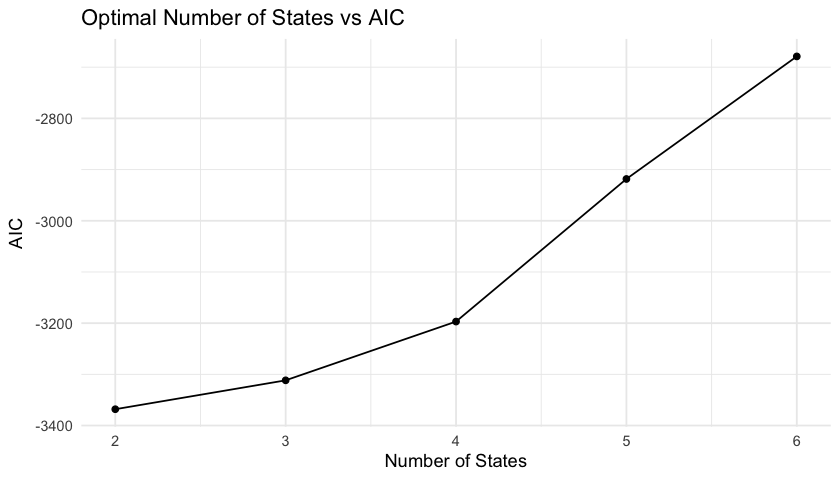

In [ ]:
optimal_n <- data.frame(
  n_states = integer(),
  AIC = numeric()
)
data <- train_data_scaled
cov_colnames <- setdiff(colnames(data), c("Date", observation))
hid_formula <- as.formula(paste("~1 +", paste(cov_colnames, collapse = " + ")))

for (n in 2:5) {
  hmm <- fit_markets_hmm(
    n_states = n,
    data = data,
    obs_name = observation,
    hid_formula = hid_formula,
    horseshoe = FALSE
    )
  optimal_n <- rbind(optimal_n, data.frame(n_states = n, AIC = hmm$AIC_conditional()))
}
options(repr.plot.width = 7, repr.plot.height = 4)  # Adjust figure size
ggplot(optimal_n, aes(x = n_states, y = AIC)) +
  geom_line() +
  geom_point() +
  labs(title = "Optimal Number of States vs AIC", x = "Number of States", y = "AIC") +
  theme_minimal()

In [44]:
hmm_2s <- fit_markets_hmm(
  n_states = 2,
  data = data,
  obs_name = observation,
  hid_formula = hid_formula,
  horseshoe = FALSE
)

hmm_3s <- fit_markets_hmm(
  n_states = 3,
  data = data,
  obs_name = observation,
  hid_formula = hid_formula,
  horseshoe = FALSE
)

Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradien

In [ ]:
extract_hid_fe <- function(hmm) {
  hid_fe <- hmm$hid()$coeff_fe()
  
  hid_fe <- data.frame(hid_fe)
  hid_fe$transition <- sapply(strsplit(rownames(hid_fe), "\\."), `[`, 1)
  hid_fe$covariate  <- sapply(strsplit(rownames(hid_fe), "\\."), `[`, 2)
  
  hid_fe_wide <- hid_fe %>%
    pivot_wider(names_from = covariate, values_from = hid_fe) %>%
    column_to_rownames("transition")
  
  return(hid_fe_wide)
}
hid_fe_2s <- extract_hid_fe(hmm_2s)
hid_fe_3s <- extract_hid_fe(hmm_3s)
hid_fe_s

(Intercept) Canada_Financials_Index Canada_Energy_Index
S1>S2  -17.18951  -11.65499                  0.06880731      
S2>S1 -271.08828   15.13364               -178.74540929      
      Canada_Materials_Index Canada_Information_Technology_Index
S1>S2 5.133392               -7.668648                          
S2>S1 1.454529               -6.474125                          
      Canada_Real_Estate_Index Canada_Consumer_Discretionary_Index
S1>S2   0.06752142             -2.516085                          
S2>S1 252.61996203             40.775048                          
      Canada_Corporate_Bonds Canada_Government_Bonds US_oil_gas
S1>S2 -11.36139               12.81035               -3.561521 
S2>S1 -60.42802              -24.80199               52.129215 
      Global_Materials US_Real_Estate SP_500   
S1>S2   0.793682        -10.73967      9.262505
S2>S1 261.110698       -305.89385     13.712960

In [46]:
hid_fe_3s

(Intercept) Canada_Financials_Index Canada_Energy_Index
S1>S2 -17.560684    7.9914002             -19.1160678        
S1>S3 -38.698555   -3.7834971              -5.0399215        
S2>S1 -23.907817  -14.3161778               1.5186461        
S2>S3 -18.266341   -0.7719930              -0.3508515        
S3>S1  -2.353971   -0.8847809               0.8700486        
S3>S2  -1.590483   -0.1756619              -0.7843240        
      Canada_Materials_Index Canada_Information_Technology_Index
S1>S2 -7.5911513               1.9162626                        
S1>S3 -0.6775956              -2.0386061                        
S2>S1  7.3013548             -10.6774959                        
S2>S3 -0.0353206              -0.7655222                        
S3>S1  2.7185383              -0.3215369                        
S3>S2  2.0560187               2.5507489                        
      Canada_Real_Estate_Index Canada_Consumer_Discretionary_Index
S1>S2  0.76752449               9.098041                          
S1>S3  0.36124274               1.952743                          
S2>S1  1.08377651              -2.899885                          
S2>S3 -0.02805362               0.584953                          
S3>S1  1.22274880               1.531667                          
S3>S2  0.10021585               1.417197                          
      Canada_Corporate_Bonds Canada_Government_Bonds US_oil_gas 
S1>S2 -18.975783              7.096683               14.12546316
S1>S3  -3.103960              5.534253               -4.34378198
S2>S1 -16.583396             18.116956               -6.11100071
S2>S3  -1.031614              1.405860               -0.08688815
S3>S1  -1.692428              3.611052                1.37318100
S3>S2  -1.227146             -0.167900                1.00909546
      Global_Materials US_Real_Estate SP_500     
S1>S2 18.1087509        -8.6871421    -14.1184032
S1>S3  6.3917498         0.2575712      2.2391033
S2>S1  0.5462385       -18.2481011     13.0104015
S2>S3 -0.2004298         1.0433434      0.1611828
S3>S1 -0.3076373        -1.2723982     -1.1586257
S3>S2  2.8710596         2.2036503      1.7842424

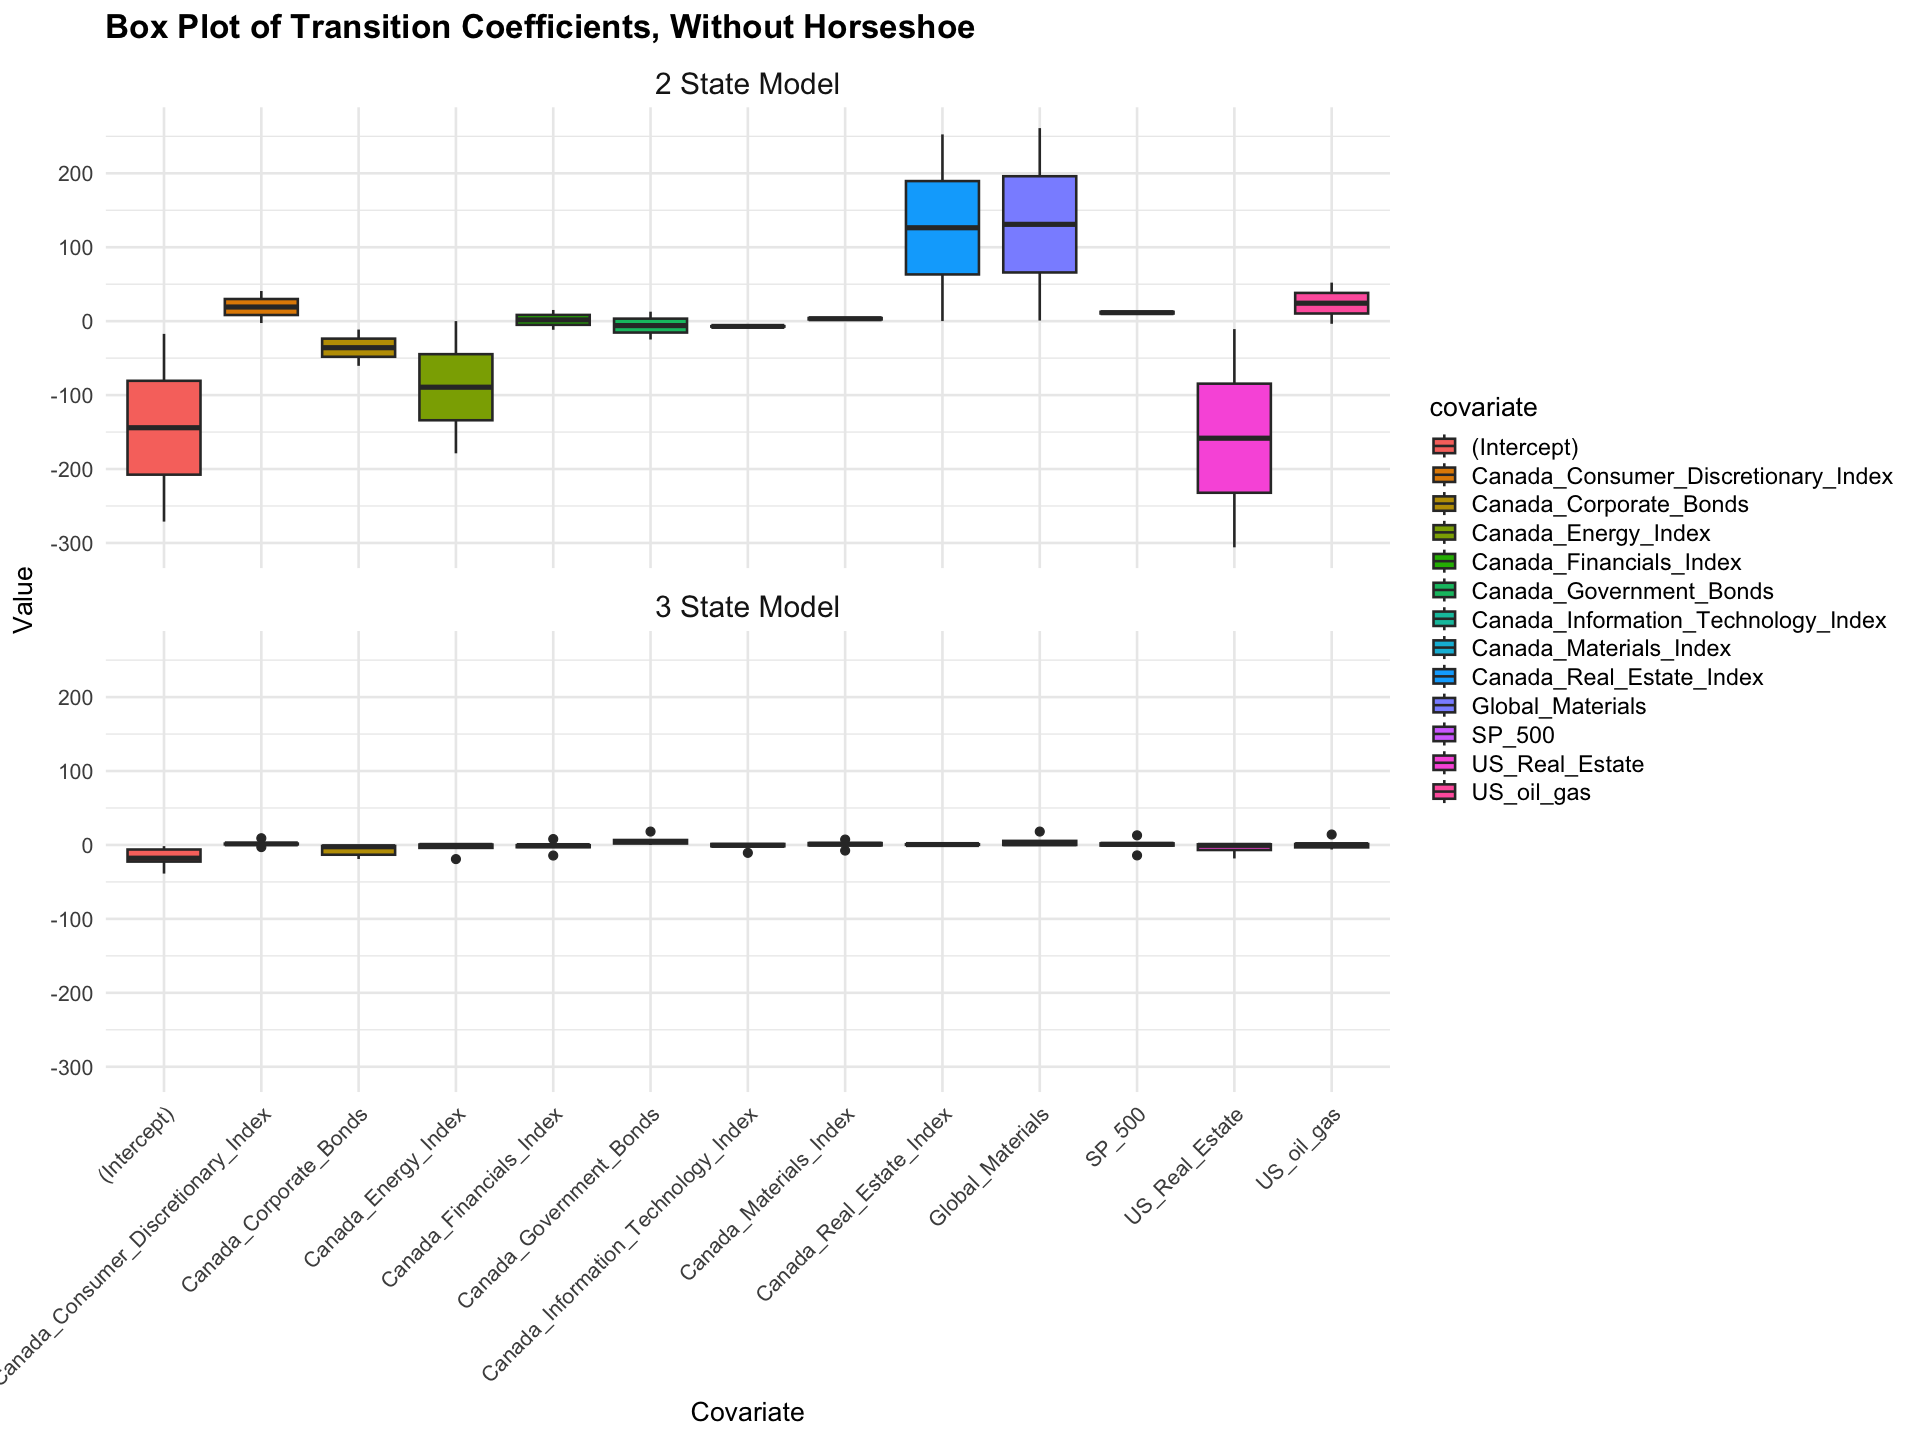

In [47]:
# Reshape hid_fe_2s and hid_fe_3s into long format for ggplot
hid_fe_2s_long <- hid_fe_2s %>%
  rownames_to_column("transition") %>%
  pivot_longer(-transition, names_to = "covariate", values_to = "value") %>%
  mutate(model = "hid_fe_2s")

hid_fe_3s_long <- hid_fe_3s %>%
  rownames_to_column("transition") %>%
  pivot_longer(-transition, names_to = "covariate", values_to = "value") %>%
  mutate(model = "hid_fe_3s")

hid_fe_long <- bind_rows(hid_fe_2s_long, hid_fe_3s_long) %>%
  mutate(model = factor(model, levels = c("hid_fe_2s", "hid_fe_3s"),
                         labels = c("2 State Model", "3 State Model")))

# Plot the boxplot
options(repr.plot.width = 16, repr.plot.height = 12)  # Adjust figure size
ggplot(hid_fe_long, aes(x = covariate, y = value, fill = covariate)) +
  geom_boxplot() +
  facet_wrap(~ model, ncol = 1) +
  labs(title = "Box Plot of Transition Coefficients, Without Horseshoe", x = "Covariate", y = "Value") +
  theme_minimal(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        strip.text = element_text(size = 18),
        plot.title = element_text(size = 20, face = "bold"),
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14))


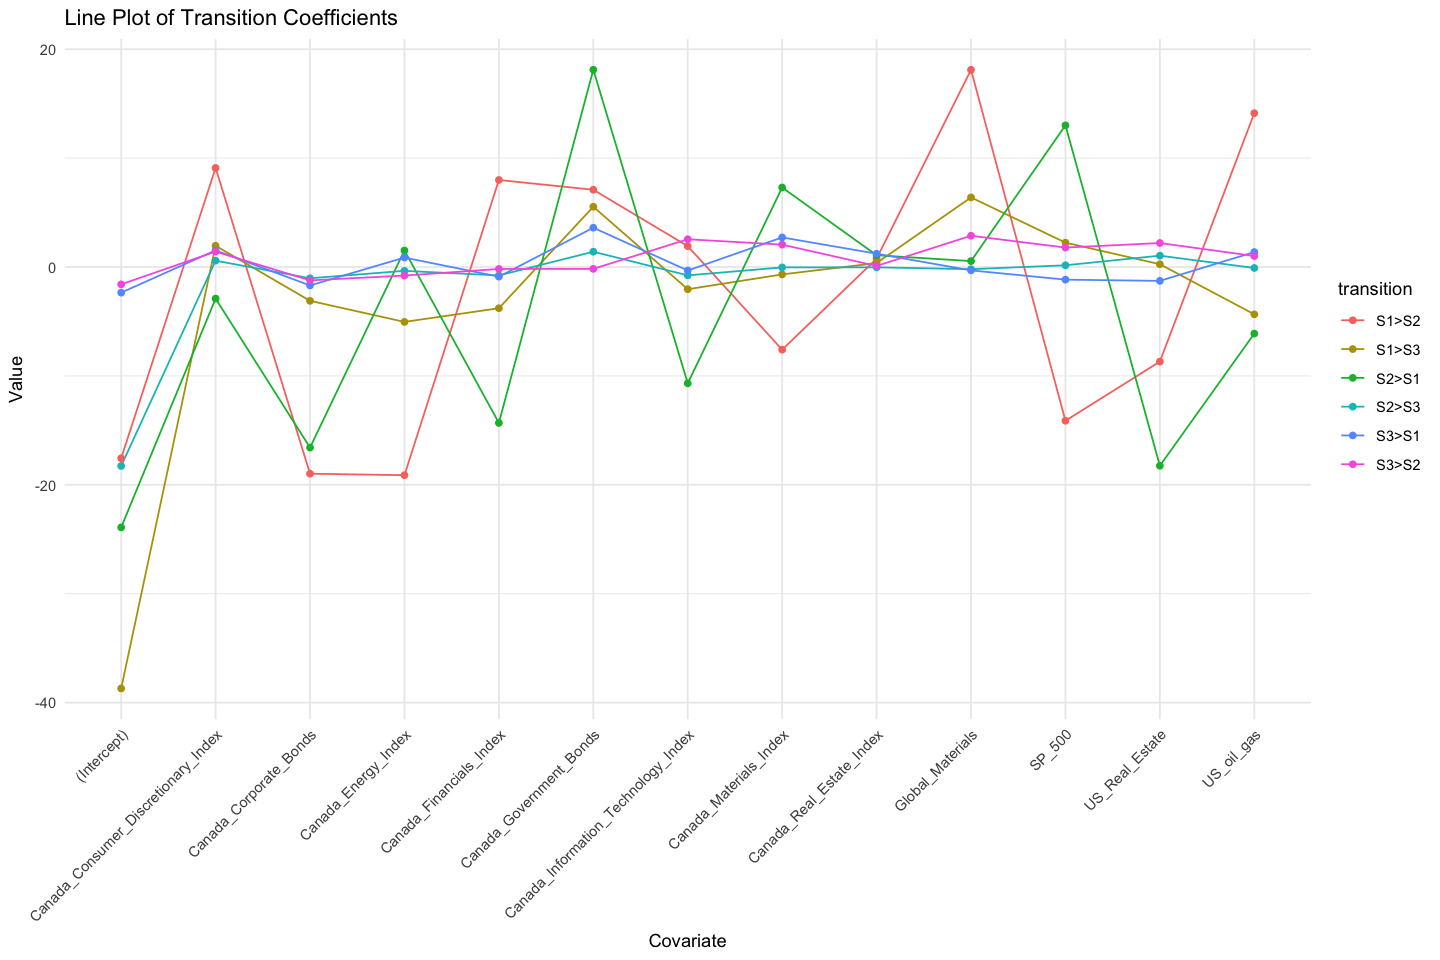

In [48]:
# Plot the line plot
options(repr.plot.width = 12, repr.plot.height = 8)  # Adjust figure size
ggplot(hid_fe_3s_long, aes(x = covariate, y = value, group = transition, color = transition)) +
  geom_line() +
  geom_point() +
  labs(title = "Line Plot of Transition Coefficients", x = "Covariate", y = "Value") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

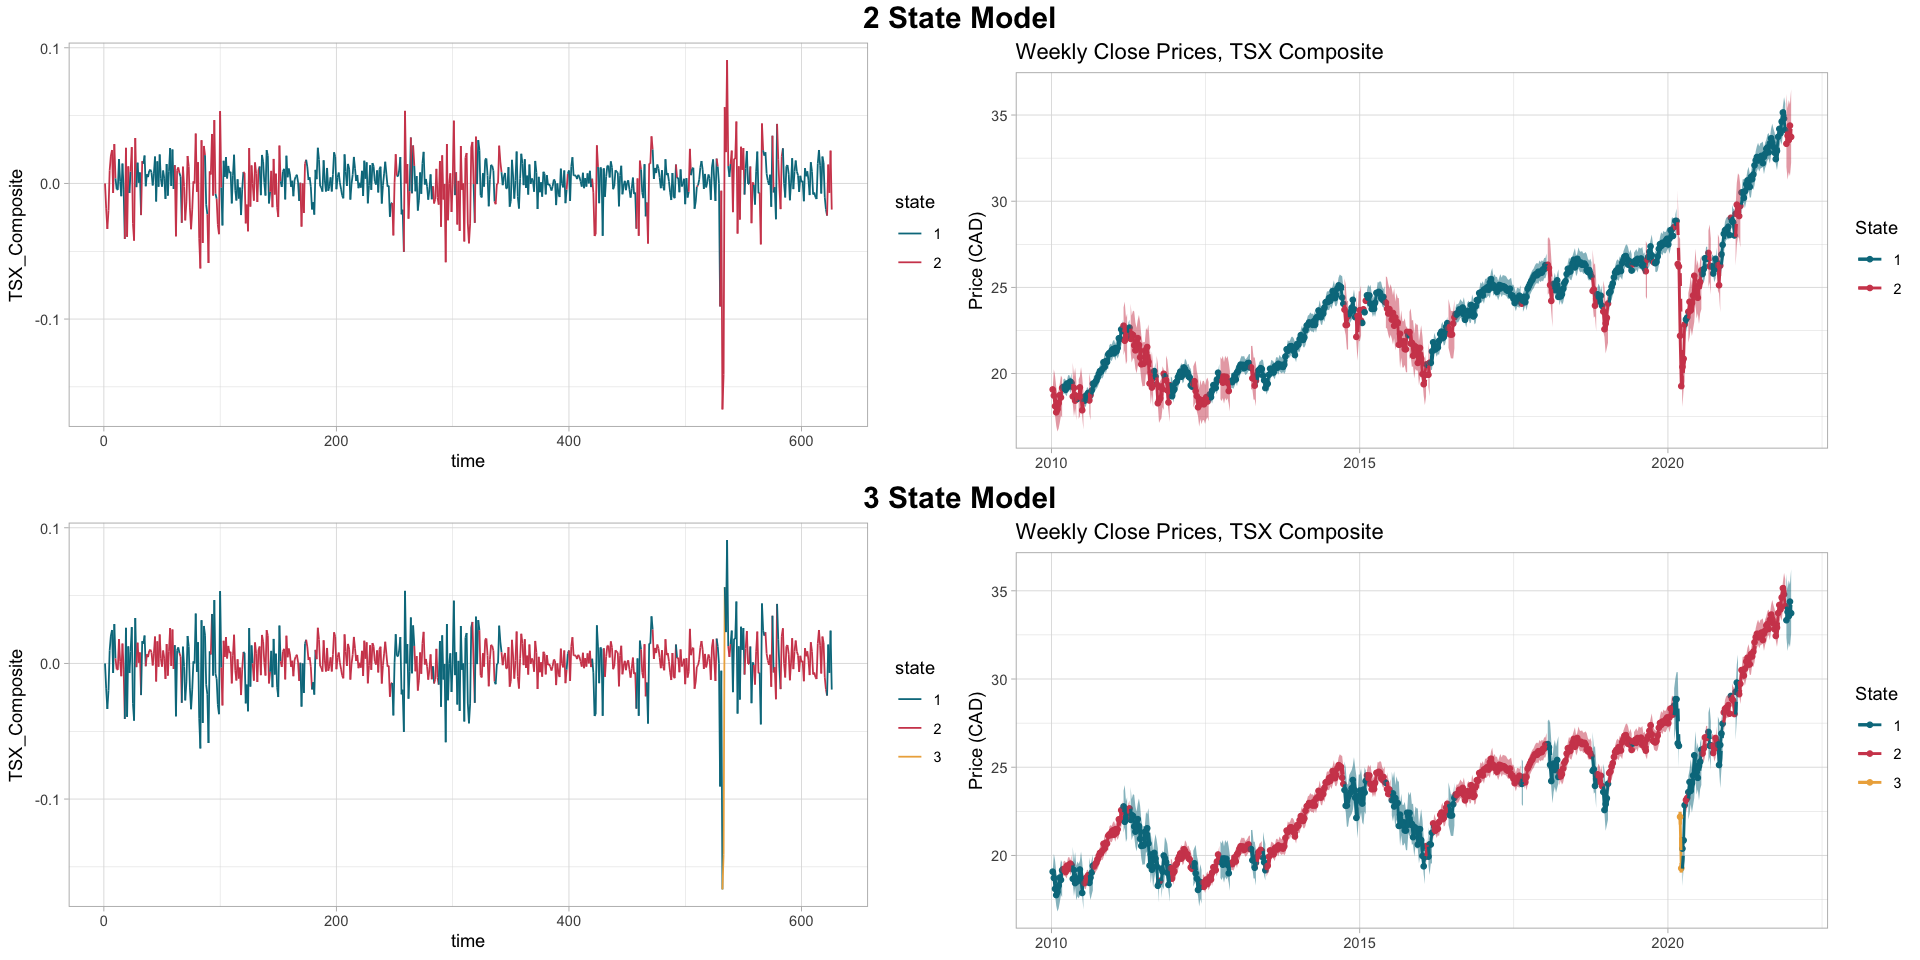

In [49]:
tsx_state_2s <- prepare_tsx_state_data(train_data, hmm_2s)
tsx_plot_2s  <- plot_tsx_state_series(tsx_state_2s, show = "both")
p_2s <- hmm_2s$plot_ts("TSX_Composite")

tsx_state_3s <- prepare_tsx_state_data(train_data, hmm_3s)
tsx_plot_3s  <- plot_tsx_state_series(tsx_state_3s, show = "both")
p_3s <- hmm_3s$plot_ts("TSX_Composite")

# options(repr.plot.width = 16, repr.plot.height = 8)  # Adjust figure size
# grid.arrange(p_2s, tsx_plot_2s, p_3s, tsx_plot_3s, ncol = 2)

library(gridExtra)
library(grid)

row_2s <- arrangeGrob(
  p_2s, tsx_plot_2s, ncol = 2,
  top = textGrob("2 State Model", gp = gpar(fontsize = 18, fontface = "bold"))
)

row_3s <- arrangeGrob(
  p_3s, tsx_plot_3s, ncol = 2,
  top = textGrob("3 State Model", gp = gpar(fontsize = 18, fontface = "bold"))
)

options(repr.plot.width = 16, repr.plot.height = 8)
grid.arrange(row_2s, row_3s, ncol = 1)


## With Horseshoe

In [132]:
load_all("../../../hmmTMB")

ℹ Loading hmmTMB


ℹ Re-compiling hmmTMB (debug build)



── R CMD INSTALL ───────────────────────────────────────────────────────────────
* installing *source* package ‘hmmTMB’ ...
** using staged installation
rm -rf *o
** libs
/opt/anaconda3/envs/hmm/lib/R/bin/Rscript --vanilla -e "invisible(TMB::compile('hmmTMB.cpp', safebounds = FALSE, safeunload = FALSE))"
Note: Using Makevars in /var/folders/1v/pf54418j6fj5541rk7ynqhgw0000gn/T//RtmpvTpNVc/fileda0445fb39f0 
using C++ compiler: ‘clang version 20.1.4’
using SDK: ‘MacOSX15.4.sdk’
make[1]: Entering directory '/Users/duncancs/Documents/Research/hmm_research/hmmTMB/src'
x86_64-apple-darwin13.4.0-clang++ -std=gnu++17 -I"/opt/anaconda3/envs/hmm/lib/R/include" -DNDEBUG -I"/opt/anaconda3/envs/hmm/lib/R/library/TMB/include" -I"/opt/anaconda3/envs/hmm/lib/R/library/RcppEigen/include"   -DTMB_EIGEN_DISABLE_WARNINGS   -DTMB_LIB_INIT=R_init_hmmTMB  -DCPPAD_FRAMEWORK -I'/opt/anaconda3/envs/hmm/lib/R/library/TMB/include' -I'/opt/anaconda3/envs/hmm/lib/R/library/RcppEigen/include' -D_FORTIFY_SOURCE=2 -isy

Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradient = args$gr, :
“NA/NaN function evaluation”
Warning message in nlminb(start = args$par, objective = args$fn, gradien

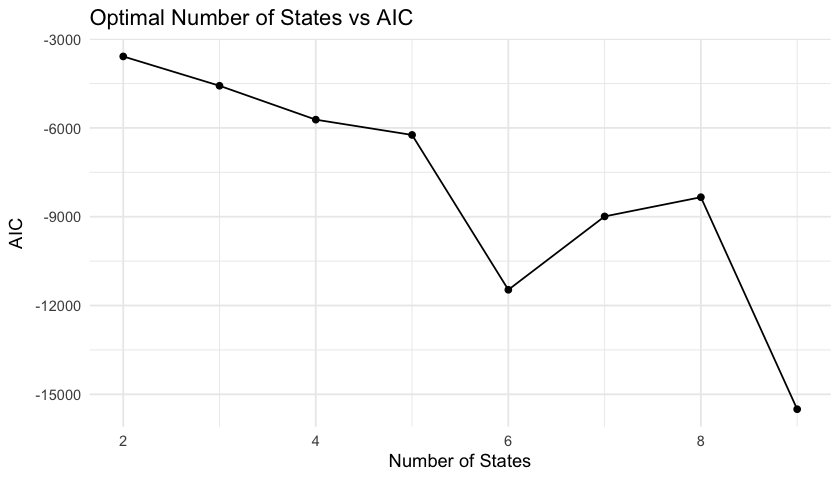

In [ ]:
optimal_n <- data.frame(
  n_states = integer(),
  AIC = numeric()
)
data <- train_data_scaled
cov_colnames <- setdiff(colnames(data), c("Date", observation))
hid_formula <- as.formula(paste("~1 +", paste(cov_colnames, collapse = " + ")))

for (n in 2:9) {
  hmm <- fit_markets_hmm(
    n_states = n,
    data = data,
    obs_name = observation,
    hid_formula = hid_formula,
    horseshoe = TRUE
    )
  optimal_n <- rbind(optimal_n, data.frame(n_states = n, AIC = hmm$AIC_conditional()))
}
options(repr.plot.width = 7, repr.plot.height = 4)  # Adjust figure size
ggplot(optimal_n, aes(x = n_states, y = AIC)) +
  geom_line() +
  geom_point() +
  labs(title = "Optimal Number of States vs AIC", x = "Number of States", y = "AIC") +
  theme_minimal()

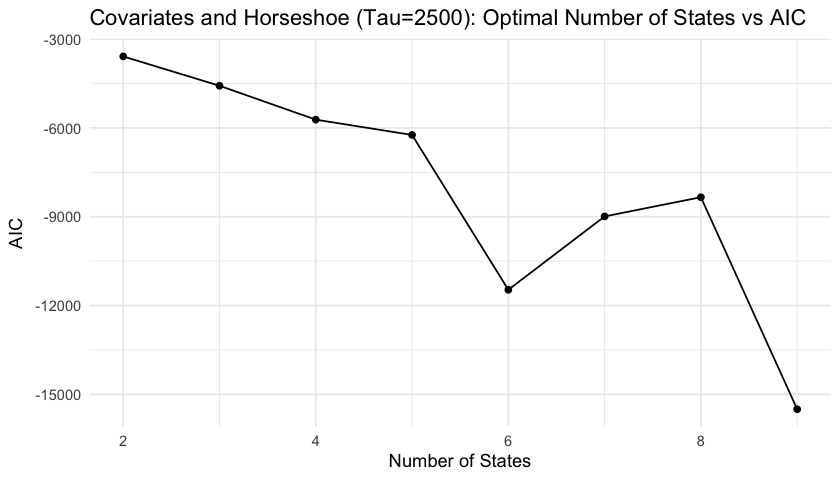

In [152]:
options(repr.plot.width = 7, repr.plot.height = 4)  # Adjust figure size
ggplot(optimal_n, aes(x = n_states, y = AIC)) +
  geom_line() +
  geom_point() +
  labs(title = "Covariates and Horseshoe (Tau=2500): Optimal Number of States vs AIC", x = "Number of States", y = "AIC") +
  theme_minimal()

In [206]:
hmm_2s <- fit_markets_hmm(
  n_states = 2,
  data = data,
  obs_name = observation,
  hid_formula = hid_formula,
  horseshoe = TRUE
)

hmm_3s <- fit_markets_hmm(
  n_states = 3,
  data = data,
  obs_name = observation,
  hid_formula = hid_formula,
  horseshoe = TRUE
)

hmm_4s <- fit_markets_hmm(
  n_states = 4,
  data = data,
  obs_name = observation,
  hid_formula = hid_formula,
  horseshoe = TRUE
)

# hmm_5s <- fit_markets_hmm(
#   n_states = 5,
#   data = data,
#   obs_name = observation,
#   hid_formula = hid_formula,
#   horseshoe = TRUE
# )

# hmm_6s <- fit_markets_hmm(
#   n_states = 6,
#   data = data,
#   obs_name = observation,
#   hid_formula = hid_formula,
#   horseshoe = TRUE
#)

Warning message in hmm$fit(silent = TRUE):
“Convergence code was not zero, indicating that the optimizer may not have converged to the correct estimates. Please check by consulting the out() function which shows what nlminb returned.”
Warning message in hmm$fit(silent = TRUE):
“Convergence code was not zero, indicating that the optimizer may not have converged to the correct estimates. Please check by consulting the out() function which shows what nlminb returned.”
Warning message in hmm$fit(silent = TRUE):
“Convergence code was not zero, indicating that the optimizer may not have converged to the correct estimates. Please check by consulting the out() function which shows what nlminb returned.”


In [207]:
extract_hid_fe <- function(hmm) {
  hid_fe <- hmm$hid()$coeff_fe()
  
  hid_fe <- data.frame(hid_fe)
  hid_fe$transition <- sapply(strsplit(rownames(hid_fe), "\\."), `[`, 1)
  hid_fe$covariate  <- sapply(strsplit(rownames(hid_fe), "\\."), `[`, 2)
  
  hid_fe_wide <- hid_fe %>%
    pivot_wider(names_from = covariate, values_from = hid_fe) %>%
    column_to_rownames("transition")
  
  return(hid_fe_wide)
}
hid_fe_2s <- extract_hid_fe(hmm_2s)
hid_fe_3s <- extract_hid_fe(hmm_3s)
hid_fe_4s <- extract_hid_fe(hmm_4s)
hid_fe_5s <- extract_hid_fe(hmm_5s)
hid_fe_6s <- extract_hid_fe(hmm_6s)


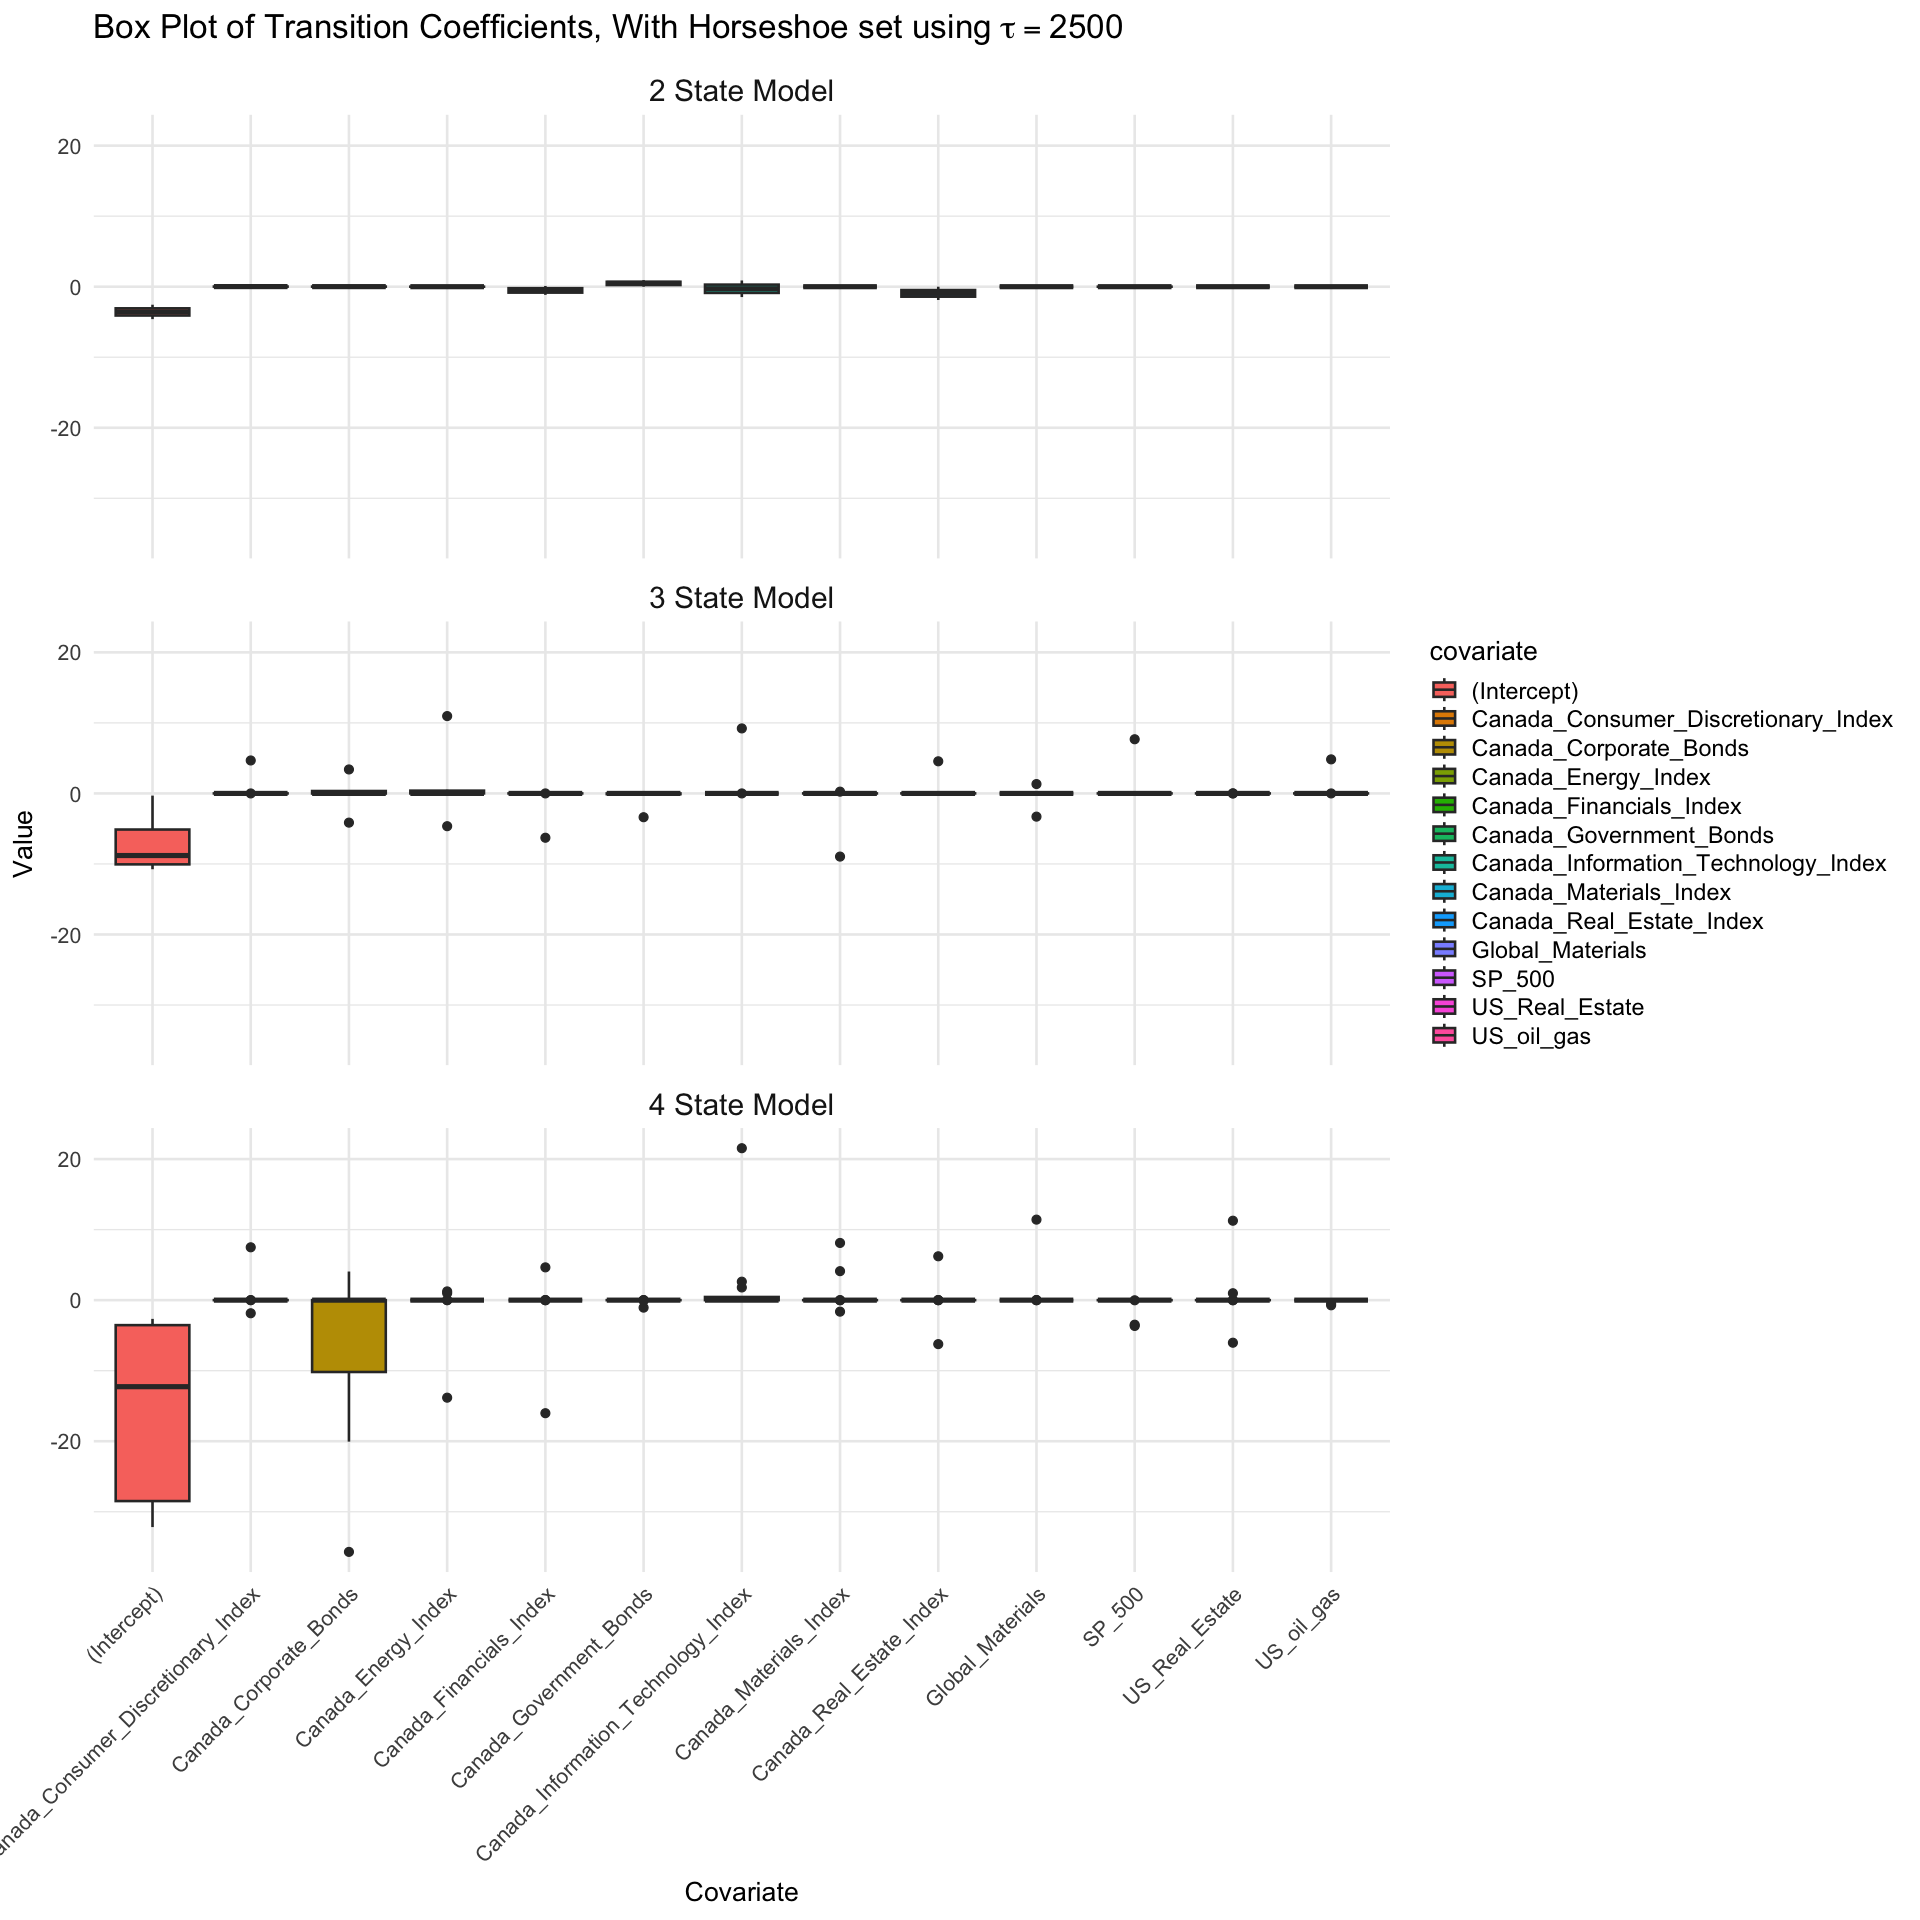

In [208]:
hid_fe_to_long <- function(hid_fe, model_label) {
  hid_fe %>%
    rownames_to_column("transition") %>%
    pivot_longer(-transition, names_to = "covariate", values_to = "value") %>%
    mutate(model = model_label)
}

hid_fe_long <- bind_rows(
  hid_fe_to_long(hid_fe_2s, "2 State Model"),
  hid_fe_to_long(hid_fe_3s, "3 State Model"),
  hid_fe_to_long(hid_fe_4s, "4 State Model")
) %>%
  mutate(model = factor(model, levels = c("2 State Model", "3 State Model", "4 State Model")))

# Plot the boxplot
options(repr.plot.width = 16, repr.plot.height = 16)  # Adjust figure size
ggplot(hid_fe_long, aes(x = covariate, y = value, fill = covariate)) +
  geom_boxplot() +
  facet_wrap(~ model, ncol = 1) +
  labs(title = expression("Box Plot of Transition Coefficients, With Horseshoe set using " * tau == 2500), x = "Covariate", y = "Value") +
  theme_minimal(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        strip.text = element_text(size = 18),
        plot.title = element_text(size = 20, face = "bold"),
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14))

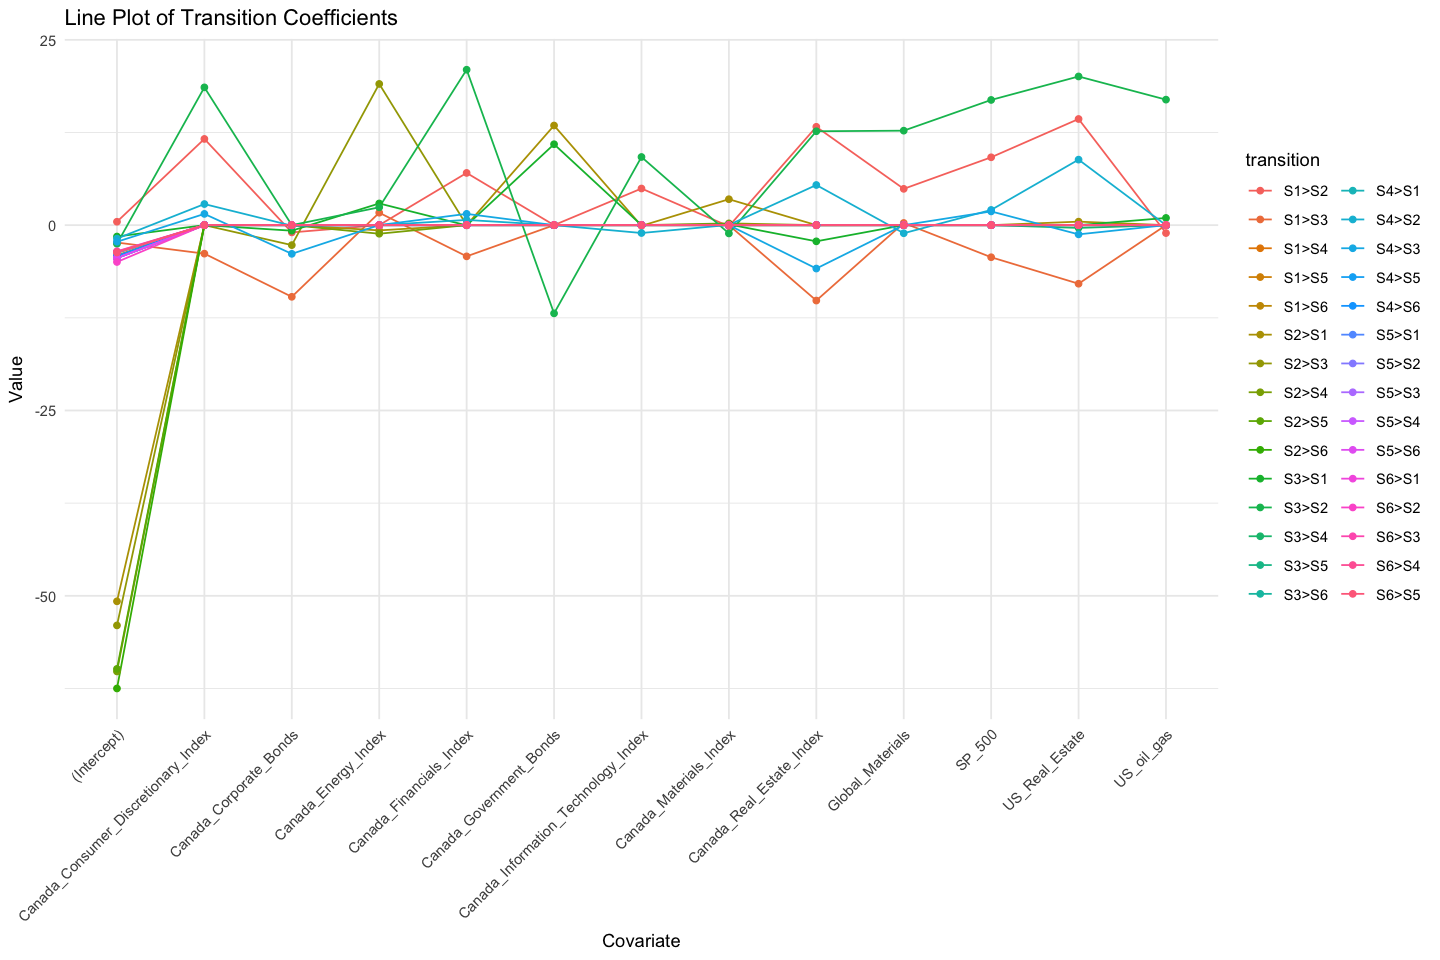

In [165]:
# Plot the line plot
options(repr.plot.width = 12, repr.plot.height = 8)  # Adjust figure size
ggplot(hid_fe_6s_long, aes(x = covariate, y = value, group = transition, color = transition)) +
  geom_line() +
  geom_point() +
  labs(title = "Line Plot of Transition Coefficients", x = "Covariate", y = "Value") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

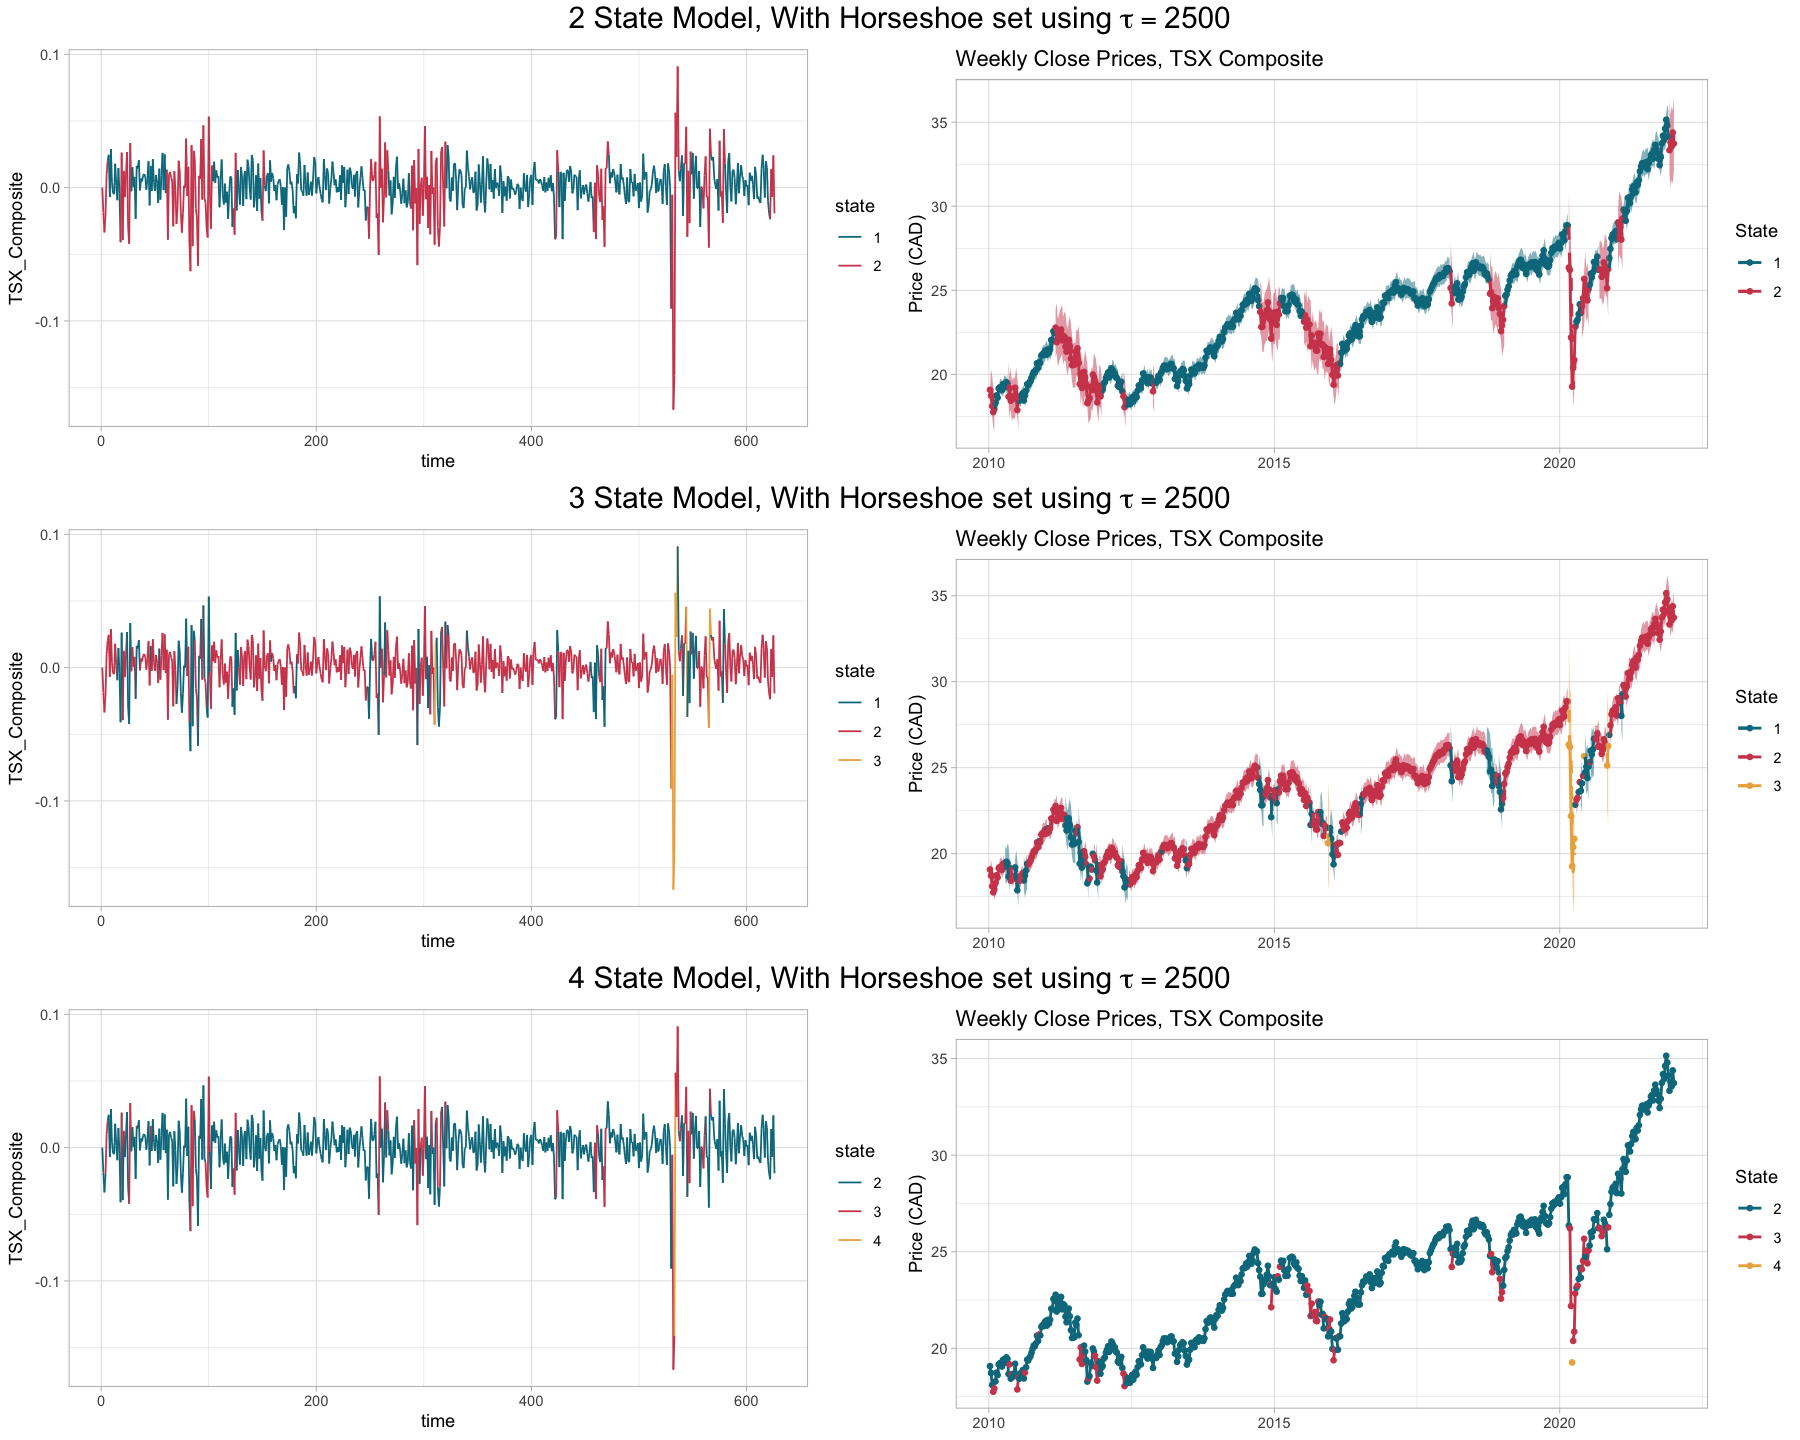

In [209]:
tsx_state_2s <- prepare_tsx_state_data(train_data, hmm_2s)
tsx_plot_2s  <- plot_tsx_state_series(tsx_state_2s, show = "both")
p_2s <- hmm_2s$plot_ts("TSX_Composite")

tsx_state_3s <- prepare_tsx_state_data(train_data, hmm_3s)
tsx_plot_3s  <- plot_tsx_state_series(tsx_state_3s, show = "both")
p_3s <- hmm_3s$plot_ts("TSX_Composite")

tsx_state_4s <- prepare_tsx_state_data(train_data, hmm_4s)
tsx_plot_4s  <- plot_tsx_state_series(tsx_state_4s, show = "states")
p_4s <- hmm_4s$plot_ts("TSX_Composite")

tsx_state_5s <- prepare_tsx_state_data(train_data, hmm_5s)
tsx_plot_5s  <- plot_tsx_state_series(tsx_state_5s, show = "both")
p_5s <- hmm_5s$plot_ts("TSX_Composite")

tsx_state_6s <- prepare_tsx_state_data(train_data, hmm_6s)
tsx_plot_6s  <- plot_tsx_state_series(tsx_state_6s, show = "both")
p_6s <- hmm_6s$plot_ts("TSX_Composite")

row_2s <- arrangeGrob(
  p_2s, tsx_plot_2s, ncol = 2,
  top = textGrob(expression("2 State Model, With Horseshoe set using " * tau == 2500), gp = gpar(fontsize = 18, fontface = "bold"))
)

row_3s <- arrangeGrob(
  p_3s, tsx_plot_3s, ncol = 2,
  top = textGrob(expression("3 State Model, With Horseshoe set using " * tau == 2500), gp = gpar(fontsize = 18, fontface = "bold"))
)

row_4s <- arrangeGrob(
  p_4s, tsx_plot_4s, ncol = 2,
  top = textGrob(expression("4 State Model, With Horseshoe set using " * tau == 2500), gp = gpar(fontsize = 18, fontface = "bold"))
)

row_5s <- arrangeGrob(
  p_5s, tsx_plot_5s, ncol = 2,
  top = textGrob(expression("5 State Model, With Horseshoe set using " * tau == 2500), gp = gpar(fontsize = 18, fontface = "bold"))
)

row_6s <- arrangeGrob(
  p_6s, tsx_plot_6s, ncol = 2,
  top = textGrob(expression("6 State Model, With Horseshoe set using " * tau == 2500), gp = gpar(fontsize = 18, fontface = "bold"))
)

options(repr.plot.width = 15, repr.plot.height = 12)
grid.arrange(row_2s, row_3s, row_4s, ncol = 1)


In [199]:
hmm_4s$print_obspar()

> Estimated observation parameters (t = 1):
                   state 1 state 2 state 3 state 4
TSX_Composite.mean  20.697   0.002   0.000  -1.816
TSX_Composite.sd     0.017   0.015   0.038   2.034



In [163]:
hmm_6s$print_obspar()

> Estimated observation parameters (t = 1):
                     state 1 state 2 state 3      state 4 state 5 state 6
TSX_Composite.mean   -11.403   0.001   8.784 3.926600e+01  30.616  19.971
TSX_Composite.sd   19723.275   0.017   9.165 3.036085e+31   0.000   2.662

